# Поиск вставок

Будем искать вставки глядя на смещение GC (GC skew). Отрезки с аномальным для данной последовательности GC skew, скорее всего, и будут местами вставок. Поиск осуществим графическим способом.

### Case 1

Для начала посмотрим на график GC skew. Это уже позволит прикинуть место вставки с хорошей точностью. Отметим, что для такого приблизительного решения стоит немного поэкспериментировать с длиной "окон", для которых вычисляется GC skew, чтобы различия были лучше видны.

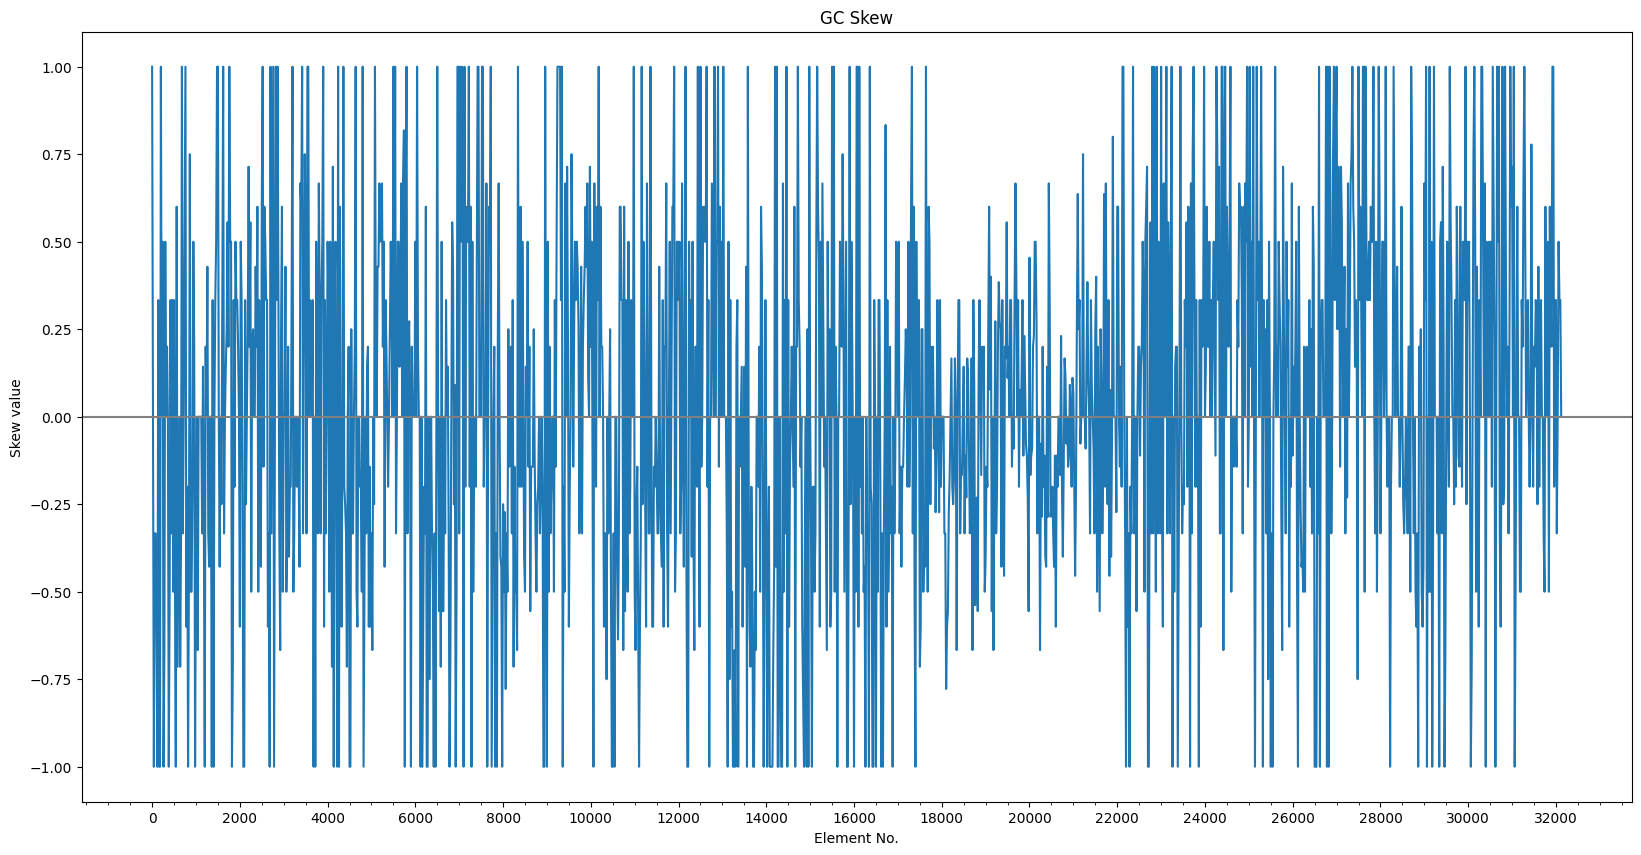

In [178]:
import Bio.SeqUtils as SU
from Bio.Seq import Seq
from Bio.SeqUtils import GC
from Bio import SeqIO

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
# import seaborn as sns

seq_orig = ""

with open("01.fasta") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        seq_orig = record


# gc_orig = SU.gc_fraction(seq_orig)
# print(f'Original record length: {seq_orig.__len__()}')
# print(f'Original GC: {gc_orig}')

current_sub = ""
current_max_insertion = ""

window_size = 20

skew = SU.GC_skew(seq_orig, window_size)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("GC Skew")
ax.plot(range(0, len(seq_orig), window_size), skew)
ax.set_xlabel("Element No.")
ax.set_ylabel("Skew value")
ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.xaxis.set_major_locator(MultipleLocator(2000))
ax.axhline(0, color='grey')
plt.show()


# for i in range(0, len(record_orig), 1):
#     print(i)
#     for j in range(i + min_size, len(record_orig)+1, step_size):
#         current_sub = record_orig[i:j]
#         # cur_dif = abs(gc_orig - SU.gc_fraction(current_sub))
#         # prev_dif = abs(gc_orig - SU.gc_fraction(current_max_insertion))

#         # wo_cur = record_orig[:i] + record_orig[j:]
#         # cur_dif = abs(gc_orig - SU.gc_fraction(current_sub))
#         SU.GC_skew()

#         # prev_dif = abs(gc_orig - SU.gc_fraction(current_max_insertion))
#         if (cur_dif > prev_dif):
#             current_max_insertion = current_sub
#             border_left = i
#             border_right = j
#             prev_dif = cur_dif


Можно заметить, что примерно между 17 500 и 22 500 элементами модуль GC skew в среднем намного ниже, чем до и после этого отрезка. Попробуем рассмотреть этот отрезок поближе.

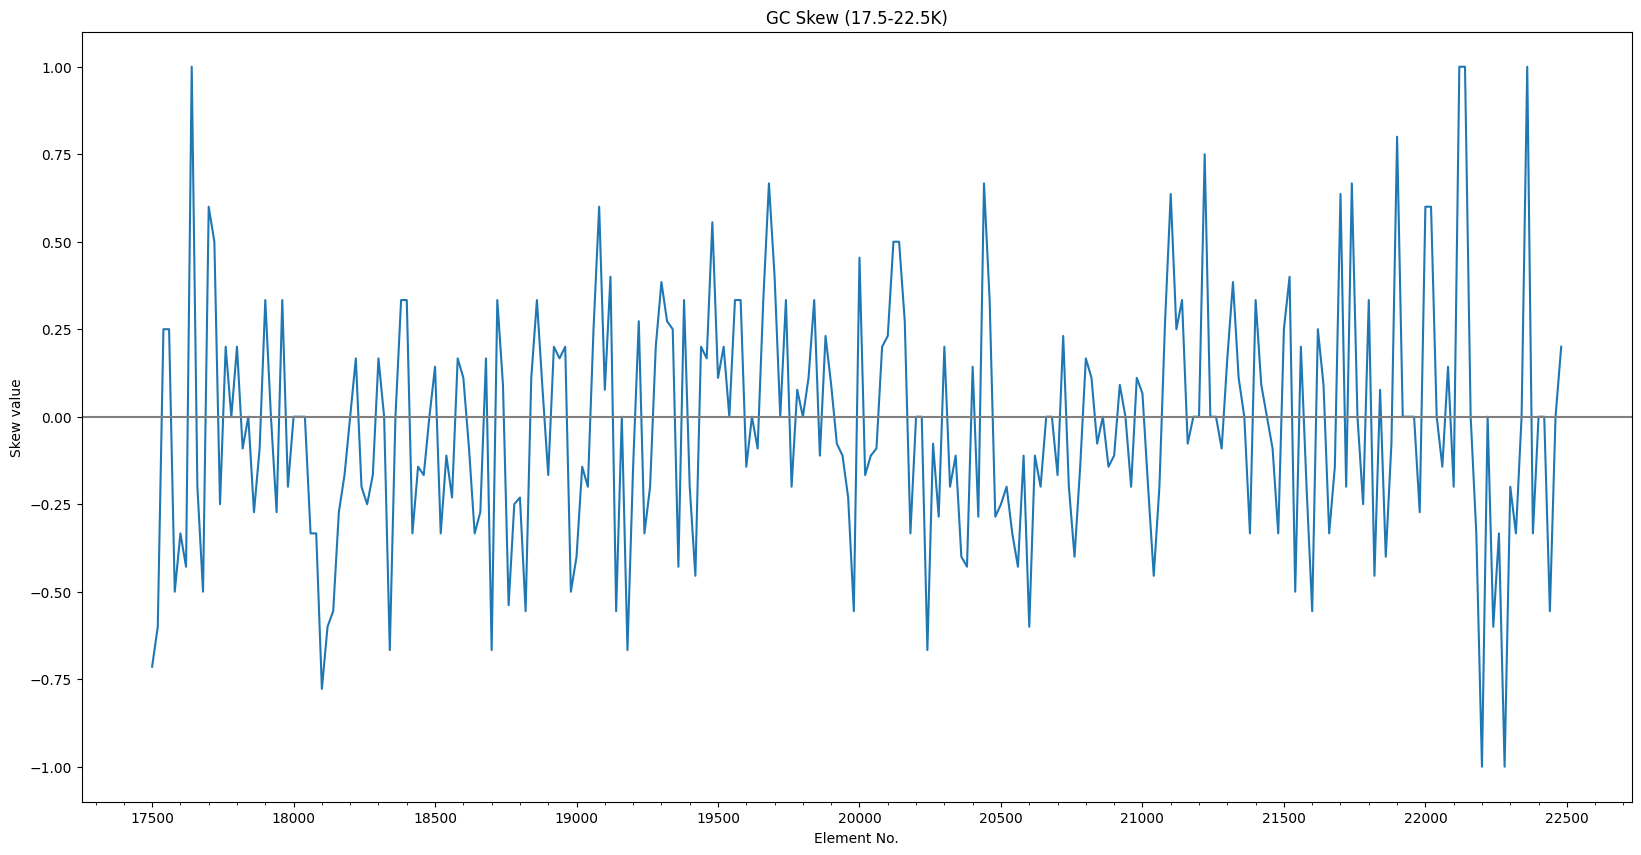

In [179]:
window_size = 20

border_left = 17500
border_right = 22500

seq_17_23 = seq_orig[border_left:border_right]

skew_17_23 = SU.GC_skew(seq_17_23, window_size)

fig_17_23, ax17_23 = plt.subplots(figsize=(20, 10))
ax17_23.set_title("GC Skew (17.5-22.5K)")
ax17_23.plot(range(border_left, border_right, window_size), skew_17_23)
ax17_23.set_xlabel("Element No.")
ax17_23.set_ylabel("Skew value")
ax17_23.xaxis.set_minor_locator(MultipleLocator(100))
ax17_23.xaxis.set_major_locator(MultipleLocator(500))
ax17_23.axhline(0, color='grey')

plt.show()


Присмотримся к правому и левому концам отрезка поближе. Можно сделать размер "окна" вычисления GC skew поменьше.

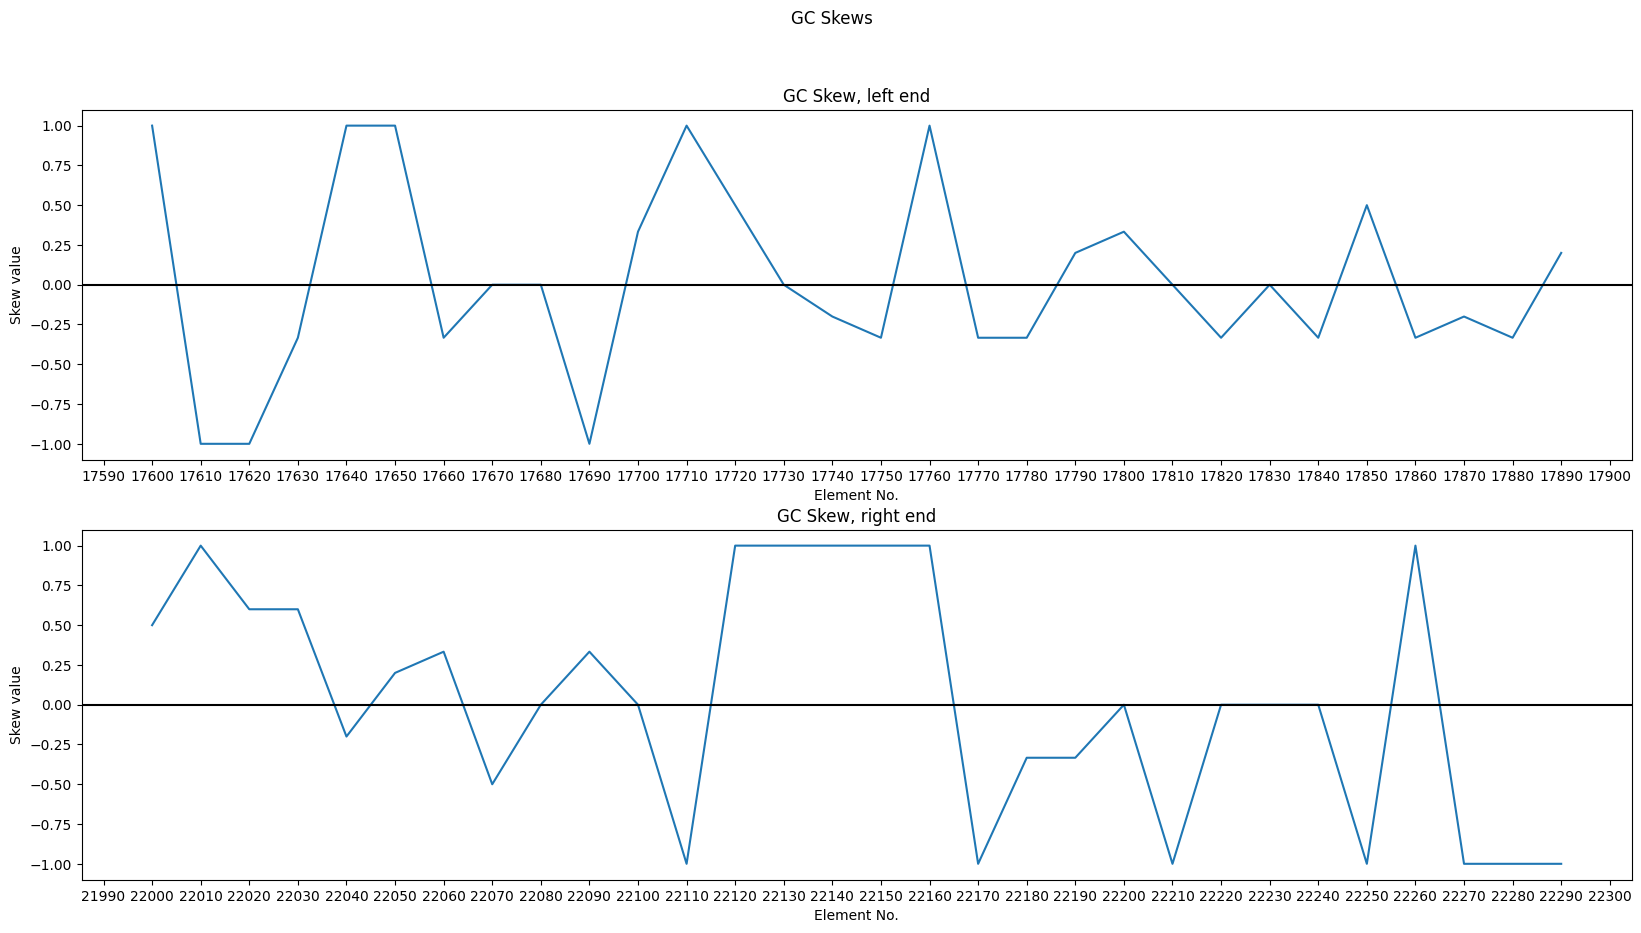

In [180]:
window_size1 = 10

fig_3, (ax_l, ax_r) = plt.subplots(2, 1, figsize=(20, 10))
fig_3.suptitle("GC Skews")

border_left_l = 17600
border_right_l = 17900

seq_l = seq_orig[border_left_l:border_right_l]
skew_l = SU.GC_skew(seq_l, window_size1)

ax_l.set_title("GC Skew, left end")
ax_l.plot(range(border_left_l, border_right_l, window_size1), skew_l)
ax_l.set_xlabel("Element No.")
ax_l.set_ylabel("Skew value")
# ax_l.xaxis.set_minor_locator(MultipleLocator(20))
ax_l.xaxis.set_major_locator(MultipleLocator(10))
ax_l.axhline(0, color='black')

border_left_r = 22000
border_right_r = 22300

seq_r = seq_orig[border_left_r:border_right_r]
skew_r = SU.GC_skew(seq_r, window_size1)

ax_r.set_title("GC Skew, right end")
ax_r.plot(range(border_left_r, border_right_r, window_size1), skew_r)
ax_r.set_xlabel("Element No.")
ax_r.set_ylabel("Skew value")
# ax_r.xaxis.set_minor_locator(MultipleLocator(100))
ax_r.xaxis.set_major_locator(MultipleLocator(10))
ax_r.axhline(0, color='black')

plt.show()


Снова уменьшим "окно" и приблизим масштаб ещё ближе?

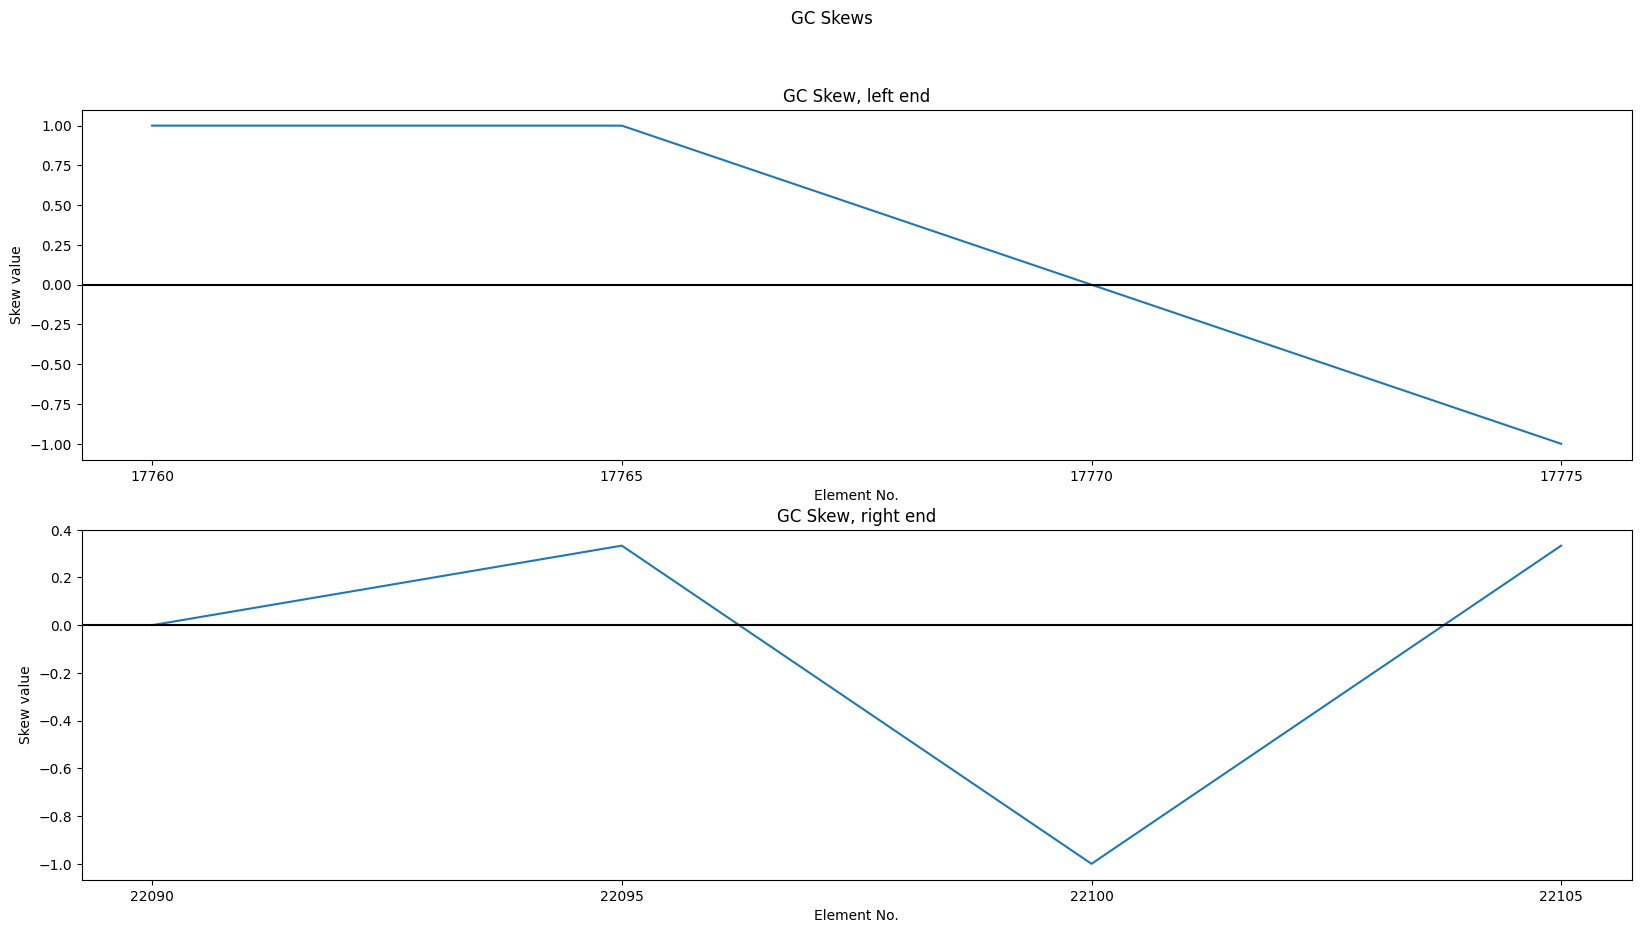

In [181]:
window_size1 = 5

fig_3, (ax_l, ax_r) = plt.subplots(2, 1, figsize=(20, 10))
fig_3.suptitle("GC Skews")

border_left_l = 17760
border_right_l = 17780

seq_l = seq_orig[border_left_l:border_right_l]
skew_l = SU.GC_skew(seq_l, window_size1)

ax_l.set_title("GC Skew, left end")
ax_l.plot(range(border_left_l, border_right_l, window_size1), skew_l)
ax_l.set_xlabel("Element No.")
ax_l.set_ylabel("Skew value")
# ax_l.xaxis.set_minor_locator(MultipleLocator(20))
ax_l.xaxis.set_major_locator(MultipleLocator(5))
ax_l.axhline(0, color='black')

border_left_r = 22090
border_right_r = 22110

seq_r = seq_orig[border_left_r:border_right_r]
skew_r = SU.GC_skew(seq_r, window_size1)

ax_r.set_title("GC Skew, right end")
ax_r.plot(range(border_left_r, border_right_r, window_size1), skew_r)
ax_r.set_xlabel("Element No.")
ax_r.set_ylabel("Skew value")
# ax_r.xaxis.set_minor_locator(MultipleLocator(100))
ax_r.xaxis.set_major_locator(MultipleLocator(5))
ax_r.axhline(0, color='black')

plt.show()


Вряд ли мы сможем получить места начала и конца вставки с большей точностью таким образом. 

#### Ответ

**Левая граница** = 17770

**Правая граница** = 22095

Погрешность не больше +-3.

In [182]:
print(f'Insertion length: {current_max_insertion.__len__()}')
print(f'Borders: left - {border_left}; right - {border_right}')
print(f'Insertion GC: {SU.gc_fraction(current_max_insertion)}')

Insertion length: 0
Borders: left - 17500; right - 22500
Insertion GC: 0
